## Who Survived the Titanic?

In [1]:
import pandas as pd 
tdf = pd.read_csv('titanic.csv', sep = ',', header=0)

# Helpful tools to learn about yoru data
#print(tdf.info())          # gives the structure of the data (rows/cols)
#print(tdf.head())          # shows the top five data entries
#print(tdf.describe())      # gives the statistics on the data in the DF

### Set up the data for the decision tree analysis

In [2]:
# Only keep the features we want to use and place the "target" at the end
tdf = tdf[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# Change sex to numeric value so we can use DecisionTreeClassifier() <-- string okay for target, but not as an input
tdf['Sex'] = tdf['Sex'].map({'male': 0, 'female': 1})

# Drop rows with missing fields
tdf = tdf.dropna() 
#print(df.info())
columns = list(tdf)

### Separate the independent variables (AKA Features) from the dependent labels (AKA Target)

In [3]:
X = tdf.iloc[:, 0:6]   # load features into X DF
Y = tdf.iloc[:, 6]     # Load target into Y DF

### Split the Training and Testing Data

In [4]:
# Ensure that the decision tree is deterministic
import numpy as np
np.random.seed(101)

In [5]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

### Generate and evaluate the model

In [6]:
from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf=4).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

# NOTE: You should, when testing models, only vary 1 thing at a time. 

In [7]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

Entropy accuracy is : 77.77777777777779%
Gini accuracy is : 83.33333333333334%


## Visualize the results

In [8]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

,Predicted Died,Predicted Survived
True Died,43,5
True Survived,7,17


[Text(774.7899394132653, 1050.96, 'Sex <= 0.5\ngini = 0.485\nsamples = 642\nvalue = [376, 266]\nclass = Pclass'),
 Text(379.9625318877551, 978.48, 'Pclass <= 1.5\ngini = 0.328\nsamples = 397\nvalue = [315, 82]\nclass = Pclass'),
 Text(175.56122448979593, 906.0, 'Age <= 36.5\ngini = 0.488\nsamples = 92\nvalue = [53, 39]\nclass = Pclass'),
 Text(37.95918367346939, 833.52, 'Fare <= 27.15\ngini = 0.482\nsamples = 37\nvalue = [15, 22]\nclass = Sex'),
 Text(18.979591836734695, 761.04, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Sex'),
 Text(56.93877551020408, 761.04, 'Age <= 17.5\ngini = 0.498\nsamples = 32\nvalue = [15, 17]\nclass = Sex'),
 Text(37.95918367346939, 688.56, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Sex'),
 Text(75.91836734693878, 688.56, 'Age <= 22.5\ngini = 0.497\nsamples = 28\nvalue = [15, 13]\nclass = Pclass'),
 Text(56.93877551020408, 616.08, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Pclass'),
 Text(94.89795918367348, 616.08, 'Age <= 27.5\ngini = 0.4

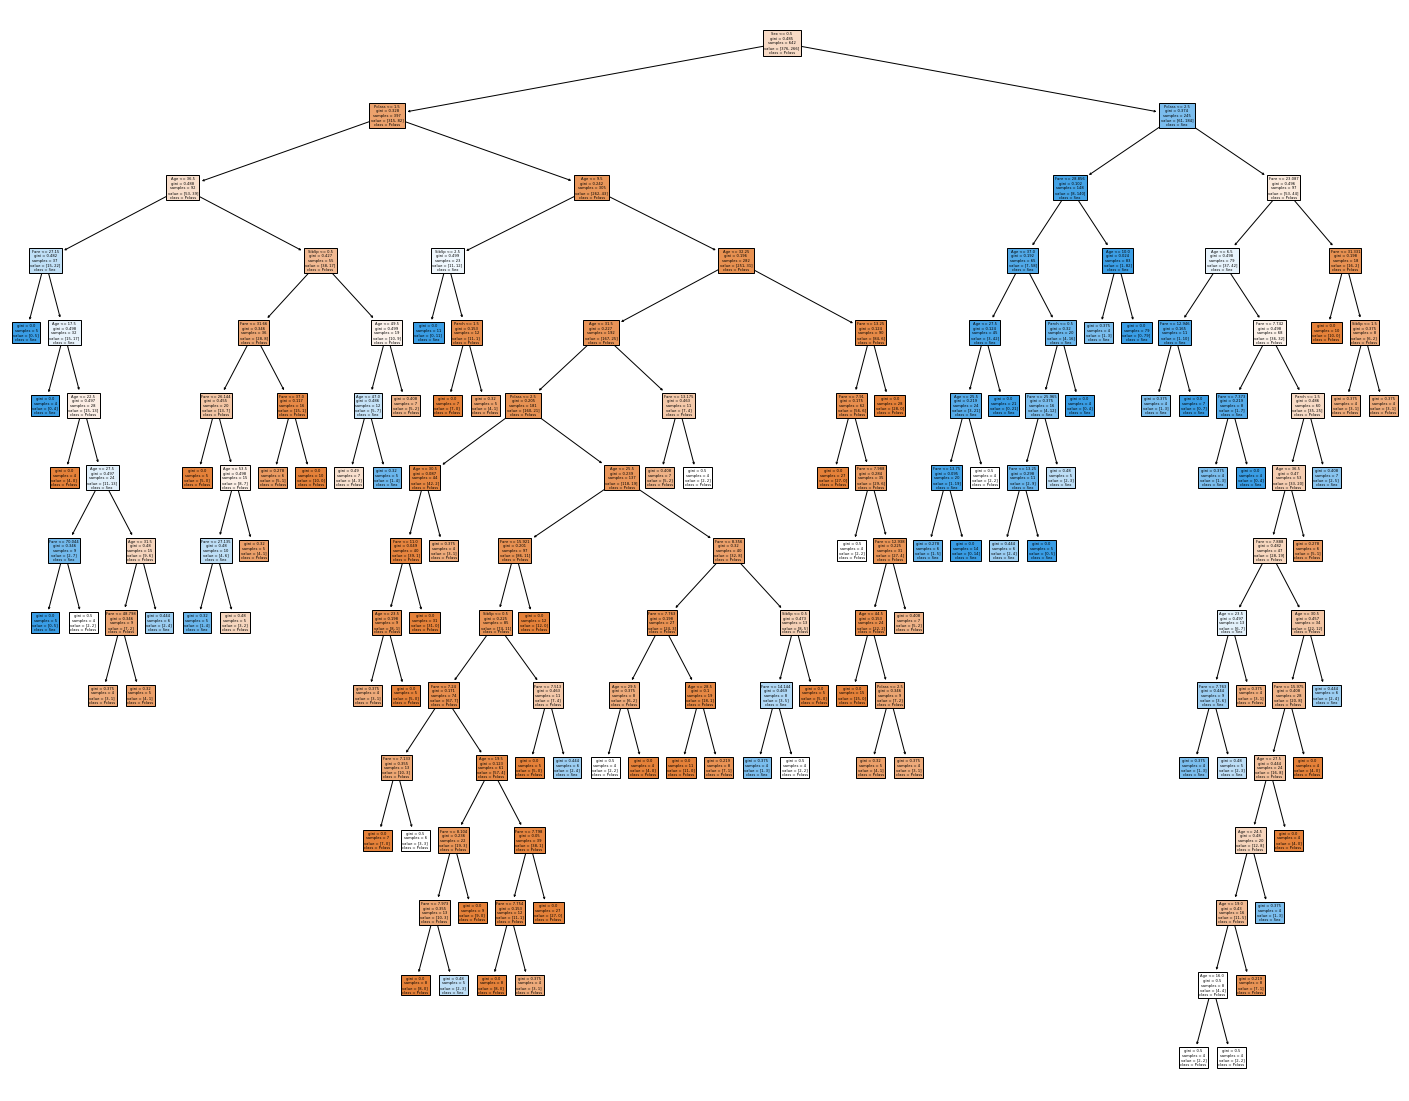

In [19]:
#create a visualization of the tree 
from sklearn import tree
import matplotlib.pyplot as plt

#This code differs from the video where it is using graphviz for visualizing the trees. Instead we will use plot_tree method
#from Sklean instead for it's simplicity.
fig = plt.figure(figsize=(25,20)) 
tree.plot_tree(model_gini,
                   feature_names=columns,  
                   class_names=columns,
                   filled=True)

In [22]:
# from sklearn import tree
# dotfile = open("dtree.dot", 'w')
# tree.export_graphviz(model_gini, out_file = dotfile)
# dotfile.close()

# import os
# os.system("dtree.png")

In [21]:
# from IPython.display import Image
# Image(filename = 'dtree.png', width=750, height=750)

[Text(2509.605, 4249.963636363636, 'Sex <= 0.5\nentropy = 0.979\nsamples = 642\nvalue = [376, 266]\nclass = Pclass'),
 Text(1206.954, 4052.2909090909093, 'Pclass <= 1.5\nentropy = 0.735\nsamples = 397\nvalue = [315, 82]\nclass = Pclass'),
 Text(488.064, 3854.618181818182, 'Age <= 36.5\nentropy = 0.983\nsamples = 92\nvalue = [53, 39]\nclass = Pclass'),
 Text(95.232, 3656.9454545454546, 'Fare <= 27.15\nentropy = 0.974\nsamples = 37\nvalue = [15, 22]\nclass = Sex'),
 Text(47.616, 3459.2727272727275, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Sex'),
 Text(142.848, 3459.2727272727275, 'Age <= 17.5\nentropy = 0.997\nsamples = 32\nvalue = [15, 17]\nclass = Sex'),
 Text(95.232, 3261.6000000000004, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Sex'),
 Text(190.464, 3261.6000000000004, 'Age <= 22.5\nentropy = 0.996\nsamples = 28\nvalue = [15, 13]\nclass = Pclass'),
 Text(142.848, 3063.927272727273, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Pclass'),
 Text(238.07999999

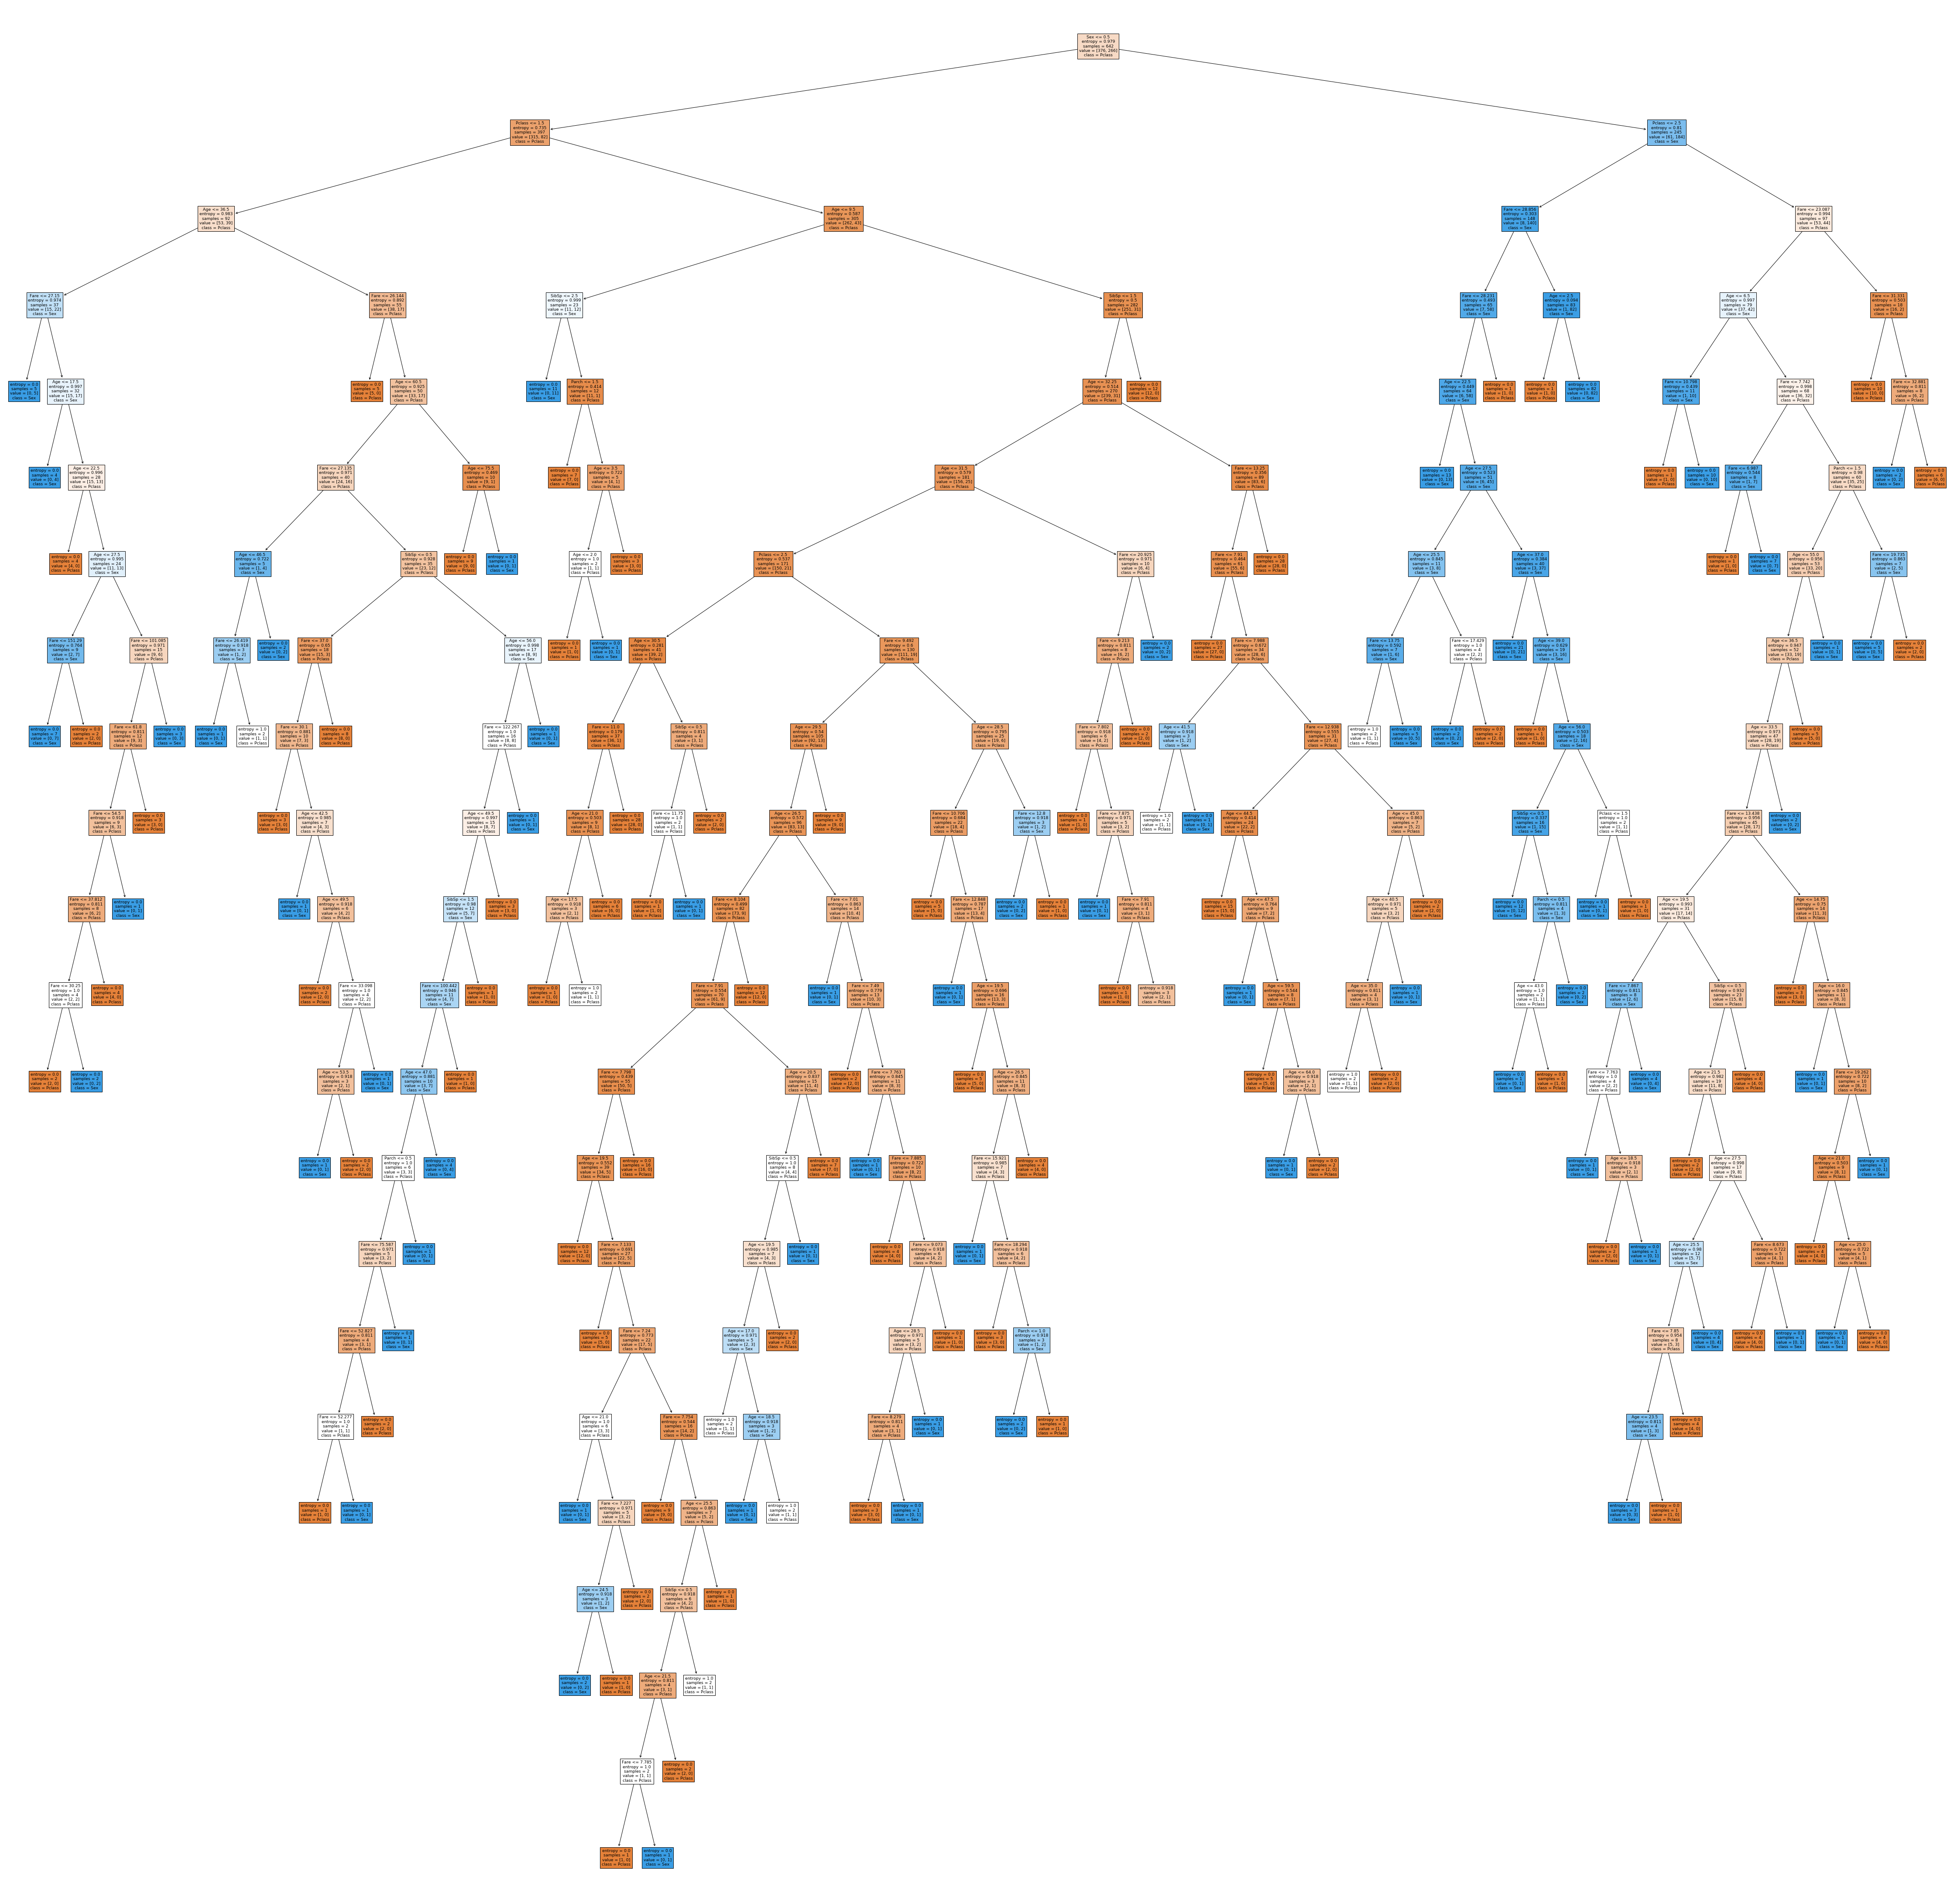

In [23]:
fig = plt.figure(figsize=(80,80)) 

tree.plot_tree(model_ent,
                   feature_names=columns,  
                   class_names=columns,
                   filled=True)